In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Базовые морфологические операции. Выбрать произвольное
изображение, содержащее дефекты формы 
(внутренние «дырки» или внешние «выступы») объектов. Используя базовые
морфологические операции, полностью убрать или минимизировать дефекты.

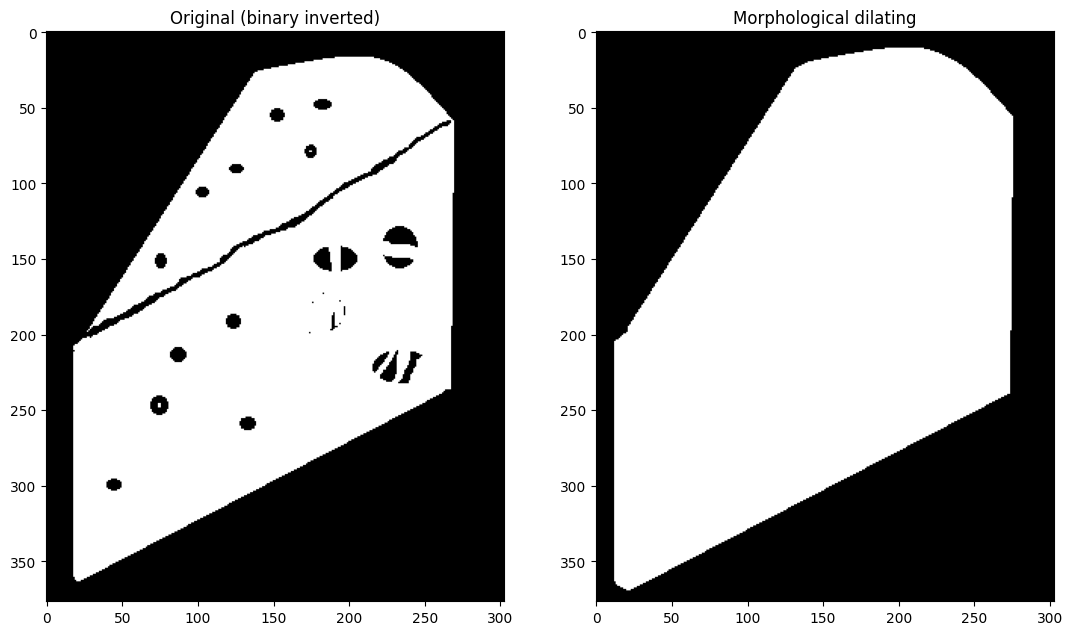

In [97]:
I = cv2.imread('myimage.png', cv2.IMREAD_GRAYSCALE)
_,binary_im = cv2.threshold(I, 200, 255, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
image_transform = cv2.morphologyEx(binary_im, cv2.MORPH_DILATE, kernel, iterations=3)
f, axs = plt.subplots(1,2, figsize=(13,13))
axs[0].imshow(binary_im, cmap='gray')
axs[1].imshow(image_transform, cmap='gray')
axs[0].set_title('Original (binary inverted)')
axs[1].set_title('Morphological dilating')
plt.show()

2. Разделение объектов. Выбрать произвольное бинарное изображение, 
содержащее перекрывающиеся объекты. 
Использовать операции бинарной морфологии для разделения объектов. 
Выделить контуры объектов

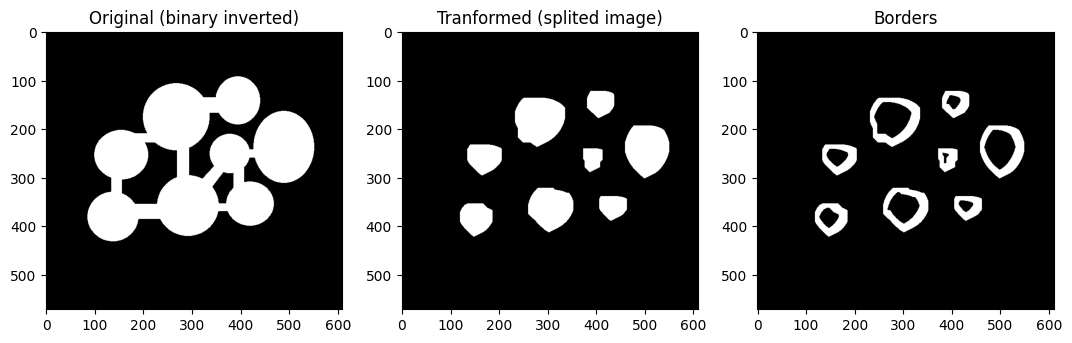

In [123]:
image = cv2.imread('pva.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
eroded = cv2.erode(binary_image, kernel, iterations=20)
dilated = cv2.dilate(eroded, kernel, iterations=10)
result = cv2.bitwise_and(dilated, image)
borders = cv2.dilate(eroded, kernel) - result 

f, axs = plt.subplots(1,3, figsize=(13,13))
axs[0].imshow(binary_image, cmap='gray')
axs[1].imshow(result, cmap='gray')
axs[2].imshow(borders, cmap='gray')
axs[0].set_title('Original (binary inverted)')
axs[1].set_title('Tranformed (splited image)')
axs[2].set_title('Borders')
plt.show()

3. Сегментация. Выбрать произвольное изображение, 
содержащее небольшое число локальных минимумов. 
Выполнить сегментацию изображения по водоразделам.